# Load model and weights 

In [15]:
from keras.models import load_model

model = load_model("ship_classification_model.h5")
# model.load_weights("boat_detector_weights.best.hdf5")

# Determine test pictures

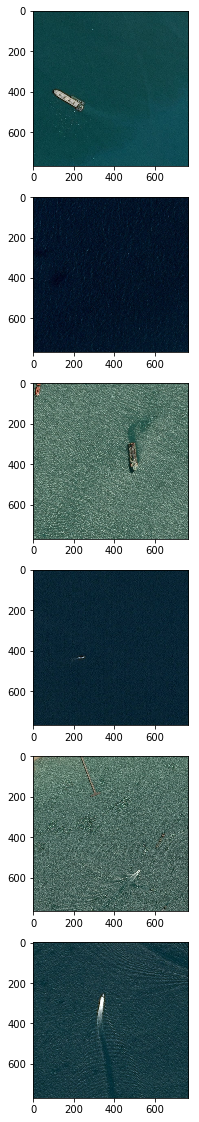

In [54]:
pictures = ["0a0df8299.jpg", "0a1a31581.jpg", "0a2c6480e.jpg", 
            "0a1b7d6ec.jpg", "0a4cad0e8.jpg", "0a5ae8465.jpg"]

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
% matplotlib inline

fig, axes = plt.subplots(6, 1, figsize=(10,20))
    
for idx, axe in enumerate(axes):
    img_path = os.path.join("input/test", pictures[idx])
    image = mpimg.imread(img_path)
    axe.imshow(image)
plt.show()

In [49]:
import os

img_path = os.path.join("input/test", pictures[5])
img = mpimg.imread(img_path)
img = np.reshape(img, (1,768,768,3))
prediction = model.predict([img], batch_size=1, verbose=1)
print(prediction)


1/1 [==============================] - 0s 309ms/step


[[0.00200733]]
